In [1]:
import pandas as pd
import sklearn 
from matplotlib import pyplot as plt 
%matplotlib inline

In [2]:
artist = pd.read_excel("a_level_artists.xlsx",sheetname="full_result_188795846")

In [3]:
artist.shape

(484656, 10)

In [4]:
#remove  383174 & remove 4243 
artist.iloc[383174]

artist_id                        \N
artist_name                      \N
number_of_tracks              24468
number_of_albums                546
number_of_playlists            6978
playlist_followers         60082591
highest_song_popularity           0
average_song_popularity           0
A_Level_Artist?                   0
B_Level Artist?                   0
Name: 383174, dtype: object

In [5]:
artist.iloc[4243]

artist_id                  0LyfQWJT6nXafLPZqxe9Of
artist_name                       Various Artists
number_of_tracks                             6730
number_of_albums                             2052
number_of_playlists                          5072
playlist_followers                       31938323
highest_song_popularity                        63
average_song_popularity                   10.6759
A_Level_Artist?                                 0
B_Level Artist?                                 0
Name: 4243, dtype: object

In [6]:
artist = artist.drop(4243,axis=0)

In [7]:
artist.shape

(484655, 10)

In [8]:
artist = artist.drop(383174,axis=0)

In [9]:
artist.shape

(484654, 10)

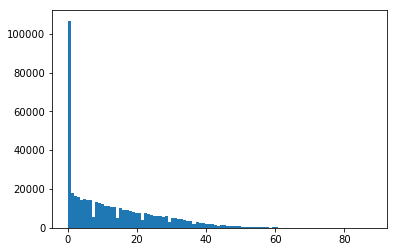

In [12]:
plt.hist(artist["average_song_popularity"],bins=100)
plt.show()

In [13]:
artist_n = artist[artist.average_song_popularity>0]

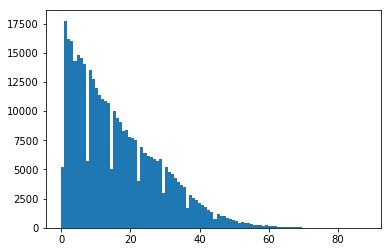

In [18]:
plt.hist(artist_n["average_song_popularity"],bins=100)
plt.show()

## V2

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn import cluster

In [20]:
art= artist_n[['number_of_tracks', 'number_of_albums',
       'number_of_playlists', 'playlist_followers']] 
#art.values
art.shape

(383173, 4)

In [21]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
art_trans = scaler.fit_transform(art)
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler() 
art_trans_2 = scaler2.fit_transform(art_trans)

In [22]:
# clu = cluster.KMeans(n_clusters=3,random_state=42)
# clu.fit(art_trans)

In [23]:
label_list = ['number_of_tracks', 'number_of_albums',
       'number_of_playlists', 'playlist_followers'] 

In [25]:
art_trans

array([[  1.07742728e-01,   3.42281879e-01,   1.00000000e+00,
          1.00000000e+00],
       [  1.88447358e-02,   7.51677852e-02,   3.47093344e-01,
          5.32873551e-01],
       [  1.39287177e-02,   4.29530201e-02,   1.50524151e-01,
          2.70207343e-01],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   2.50789988e-05,
          2.39412905e-07],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.99950477e-07],
       [  0.00000000e+00,   0.00000000e+00,   3.00947986e-04,
          3.75512099e-05]])

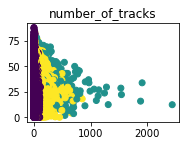

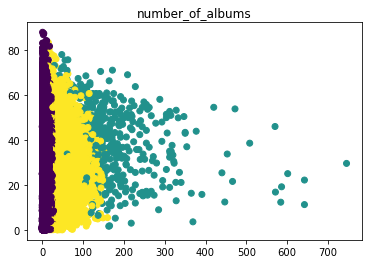

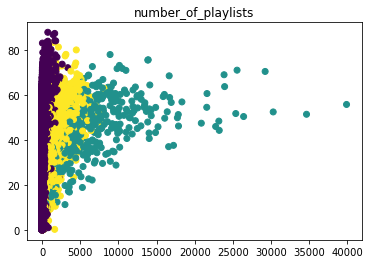

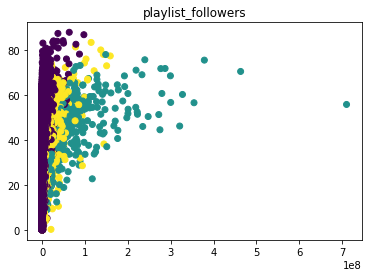

In [26]:
y_pred = cluster.KMeans(n_clusters=3, random_state=42,init = 'k-means++').fit_predict(art_trans)

plt.subplot(221)
for i in [2,3,4,5]:
    plt.scatter(artist_n.values[:,i], artist_n.values[:,7], c=y_pred)
    plt.title(label_list[i-2])
    plt.show()

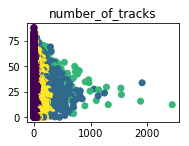

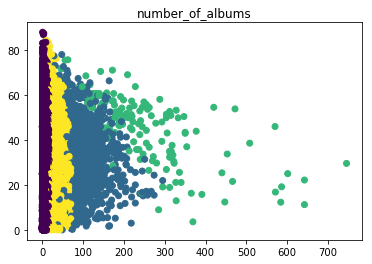

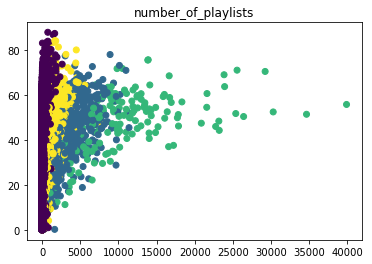

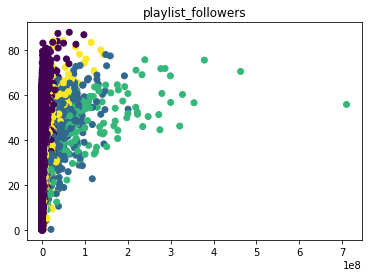

In [27]:
y_pred = cluster.KMeans(n_clusters=4, random_state=42,init = 'k-means++').fit_predict(art_trans)

plt.subplot(221)
for i in [2,3,4,5]:
    plt.scatter(artist_n.values[:,i], artist_n.values[:,7], c=y_pred)
    plt.title(label_list[i-2])
    plt.show()

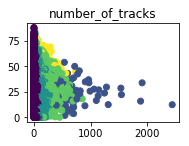

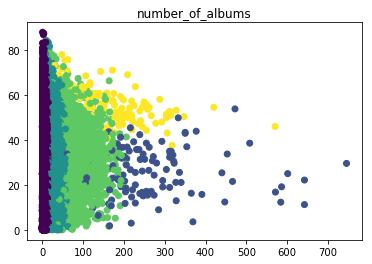

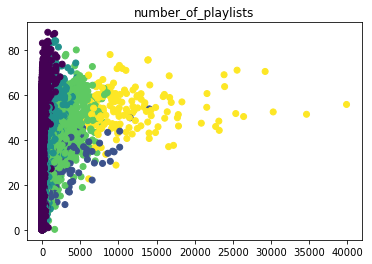

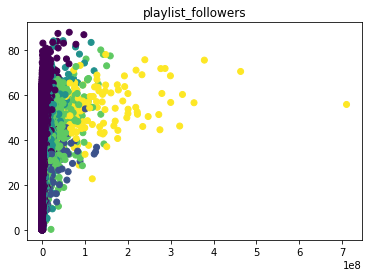

In [28]:
y_pred = cluster.KMeans(n_clusters=5, random_state=42,init = 'k-means++').fit_predict(art_trans)

plt.subplot(221)
for i in [2,3,4,5]:
    plt.scatter(artist_n.values[:,i], artist_n.values[:,7], c=y_pred)
    plt.title(label_list[i-2])
    plt.show()

In [29]:
from sklearn.mixture import GaussianMixture

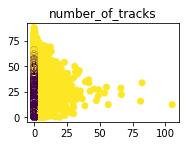

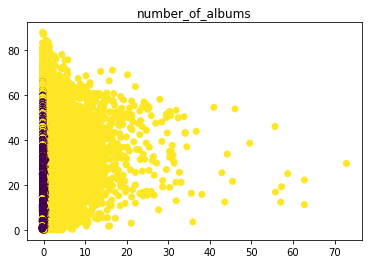

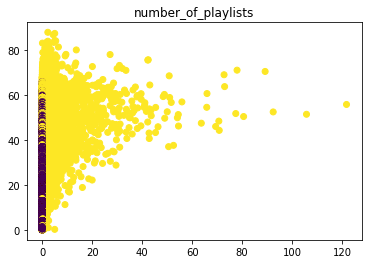

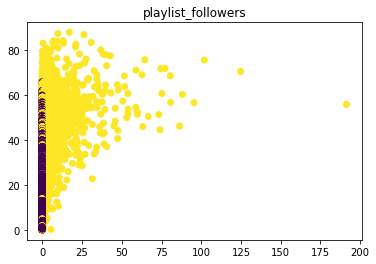

In [65]:
GMX = GaussianMixture(n_components=2)
GMX.fit(art_trans_2)
y_pred = GMX.predict(art_trans)

plt.subplot(221)
for i in list(range(4)):
    plt.scatter(art_trans[:,i], artist_n.values[:,7], c=y_pred)
    plt.title(label_list[i])
    plt.show()

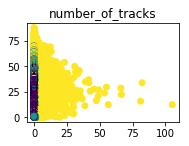

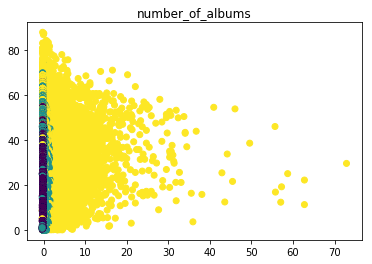

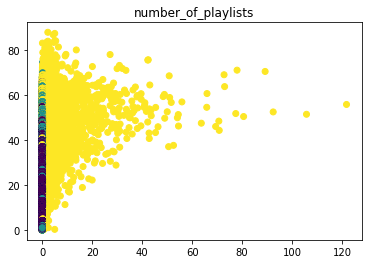

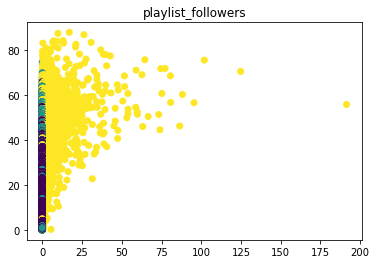

In [66]:
GMX = GaussianMixture(n_components=4)
GMX.fit(art_trans_2)
y_pred = GMX.predict(art_trans_2)

plt.subplot(221)
for i in list(range(4)):
    plt.scatter(art_trans_2[:,i], artist_n.values[:,7], c=y_pred)
    plt.title(label_list[i])
    plt.show()

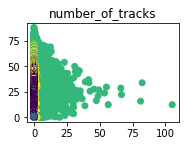

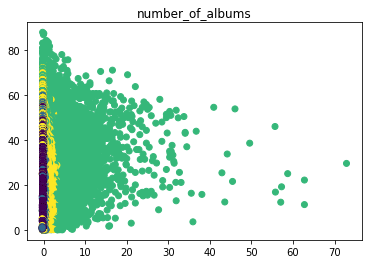

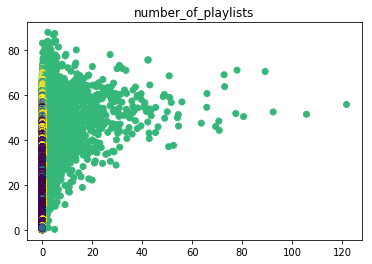

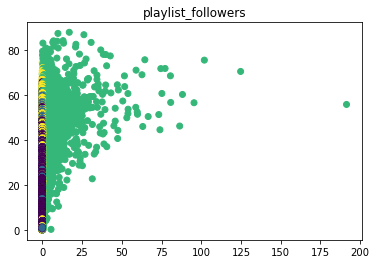

In [67]:
GMX = GaussianMixture(n_components=4)
GMX.fit(art_trans_2)
y_pred = GMX.predict(art_trans_2)

plt.subplot(221)
for i in list(range(4)):
    plt.scatter(art_trans_2[:,i], artist_n.values[:,7], c=y_pred)
    plt.title(label_list[i])
    plt.show()

## V1

In [73]:
from sklearn import cluster

#Note - most of these input parms, except the first, help ensure stability of the fit
km = cluster.KMeans(n_clusters = 3, init = 'k-means++', n_init = 5)
km.fit(artist[['number_of_tracks', 'number_of_albums',
       'number_of_playlists', 'playlist_followers', 'highest_song_popularity',
       'average_song_popularity']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [75]:
X= artist[['number_of_tracks', 'number_of_albums',
       'number_of_playlists', 'playlist_followers', 'highest_song_popularity',
       'average_song_popularity']]

In [76]:
X.shape

(484656, 6)

In [77]:
clu = cluster.KMeans(n_clusters=3,random_state=42)
clu.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

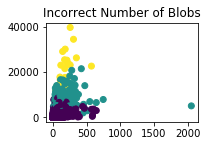

In [78]:
X= artist[['number_of_tracks', 'number_of_albums',
       'number_of_playlists', 'playlist_followers', 'highest_song_popularity',
       'average_song_popularity']]
y_pred = cluster.KMeans(n_clusters=3, random_state=42,init = 'k-means++', n_init = 5).fit_predict(X)

plt.subplot(221)
plt.scatter(X["number_of_albums"], X["number_of_playlists"], c=y_pred)
plt.title("Incorrect Number of Blobs")
plt.show()

In [79]:
a = artist[['number_of_tracks', 'number_of_albums',
       'number_of_playlists', 'playlist_followers', 'highest_song_popularity',
       'average_song_popularity']]
a.describe()

,number_of_tracks,number_of_albums,number_of_playlists,playlist_followers,highest_song_popularity,average_song_popularity
count,484656.000000,484656.000000,484656.000000,4.846560e+05,484656.000000,484656.000000
mean,6.073149,3.374362,26.032297,2.236616e+05,17.214007,12.847753
std,41.976589,9.628498,291.429740,3.301190e+06,16.556009,12.852670
min,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,1.000000,1.000000,1.000000,6.800000e+02,2.000000,1.333333
50%,1.000000,1.000000,2.000000,2.945000e+03,13.000000,9.166667
75%,4.000000,3.000000,6.000000,1.799225e+04,29.000000,20.863636
max,24468.000000,2052.000000,39875.000000,7.100703e+08,100.000000,88.000000


In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
a_fit = scaler.fit_transform(a)

In [81]:
clu = cluster.KMeans(n_clusters=3,random_state=42)
clu.fit(a_fit)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

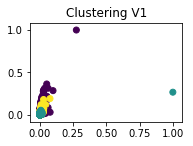

In [64]:
y_pred = cluster.KMeans(n_clusters=3, random_state=42,init = 'k-means++', n_init = 5).fit_predict(a_fit)

plt.subplot(221)
plt.scatter(a_fit[:,0],a_fit[:,1], c=y_pred)
plt.title("Clustering V1")
plt.show()

In [65]:
np.where(a_fit[:,1] == max(a_fit[:,1]))

(array([4243]),)

In [66]:
np.where(a_fit[:,0] == max(a_fit[:,0]))

(array([383174]),)

In [67]:
a.iloc[4243]

number_of_tracks           6.730000e+03
number_of_albums           2.052000e+03
number_of_playlists        5.072000e+03
playlist_followers         3.193832e+07
highest_song_popularity    6.300000e+01
average_song_popularity    1.067587e+01
Name: 4243, dtype: float64

In [58]:
a.shape

(484656, 6)

In [54]:
clu = cluster.KMeans(n_clusters=3,random_state=42)
clu.fit(new_a)
y_pred = cluster.KMeans(n_clusters=3, random_state=42,init = 'k-means++', n_init = 5).fit_predict(new_a)

plt.subplot(221)
plt.scatter(new_a[:,0],new_a[:,1], c=y_pred)
plt.title("Incorrect Number of Blobs")
plt.show()

/Users/sunevan/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: n_samples=1 should be >= n_clusters=3

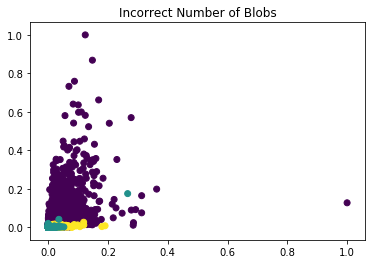

In [42]:
plt.scatter(a[:,1],a[:,2], c=y_pred)
plt.title("Incorrect Number of Blobs")
plt.show()

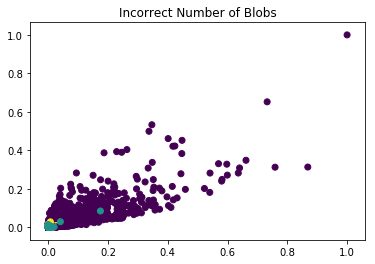

In [43]:
plt.scatter(a[:,2],a[:,3], c=y_pred)
plt.title("Incorrect Number of Blobs")
plt.show()

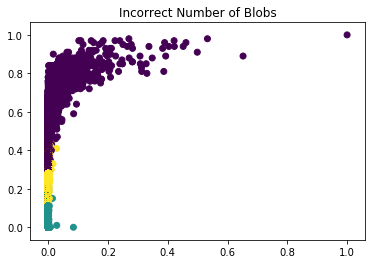

In [44]:
plt.scatter(a[:,3],a[:,4], c=y_pred)
plt.title("Incorrect Number of Blobs")
plt.show()

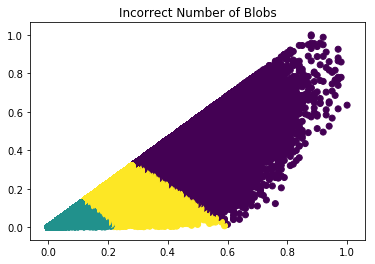

In [45]:
plt.scatter(a[:,4],a[:,5], c=y_pred)
plt.title("Incorrect Number of Blobs")
plt.show()

In [46]:
plt.scatter(a[:,5],a[:,6], c=y_pred)
plt.title("Incorrect Number of Blobs")
plt.show()

IndexError: index 6 is out of bounds for axis 1 with size 6